In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from scipy.stats import binned_statistic

In [2]:
data = np.load('twi_neo_repeat3_iz_np1_v2.2_10yrsslv2.npz')['obs_array'].copy()

In [3]:
data

array([(     0, 6.02132338, 2), (     1, 4.57570226, 2),
       (     2, 1.32594471, 1), ..., (231822, 0.        , 0),
       (231823, 0.        , 0), (231824, 0.        , 0)],
      dtype=[('observationId', '<i8'), ('streak_len_deg', '<f8'), ('n_streaks', '<i8')])

In [4]:
con = sqlite3.connect('twi_neo_repeat3_iz_np1_v2.2_10yrs.db')
orig = pd.read_sql('select * from observations where night < 366', con)

In [5]:
orig.shape

(231907, 44)

In [6]:
data.shape

(117967,)

In [7]:
indx = np.in1d(orig['observationId'].values, data['observationId'])

orig = orig.iloc[np.where(indx == True)[0]]



In [8]:
twi_indx = np.where(orig['visitExposureTime'] < 20)[0]
reg_indx = np.where(orig['visitExposureTime'] >= 20)[0]

In [9]:
twi_indx.shape

(35890,)

In [10]:
data['streak_len_deg'][twi_indx].mean()

1.2645168199566064

In [11]:
data['streak_len_deg'][reg_indx].mean()

0.33177383876696936

In [12]:
pix_width = 40
pix_lost = data['streak_len_deg'][twi_indx].mean() * 3600/.2 * pix_width
pix_lost, pix_lost/2.9e9*100

(910452.1103687566, 0.03139490035754333)

In [13]:
pix_lost = data['streak_len_deg'][reg_indx].mean() * 3600/.2 * pix_width
pix_lost, pix_lost/2.9e9*100

(238877.16391221792, 0.008237143583179929)

In [14]:
pix_lost = data['streak_len_deg'].mean() * 3600/.2 * pix_width
pix_lost, pix_lost/2.9e9*100

(443195.53115327, 0.015282604522526552)

In [15]:

orig['altitude'].values[twi_indx]

array([38.19000149, 38.37409706, 35.65393484, ..., 28.46467862,
       28.87084509, 29.23482277])

In [16]:
mean_n_s, alts, bd = binned_statistic(orig['altitude'].values[twi_indx], data['n_streaks'][twi_indx], bins=20)

Text(0.5, 1.0, 'Twilight 15s NEO observations, Starlink v2')

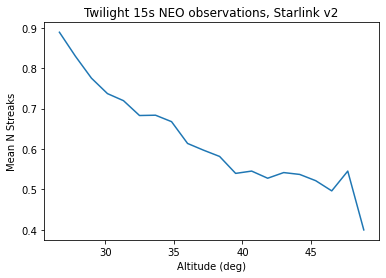

In [17]:
plt.plot(alts[1:], mean_n_s)
plt.xlabel('Altitude (deg)')
plt.ylabel('Mean N Streaks')
plt.title('Twilight 15s NEO observations, Starlink v2')